<a href="https://colab.research.google.com/github/MonseMontesBocanegra/4105_IntroML/blob/main/Monse_MontesBocanegra_801297280_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[1 2 3]
 [3 4 5]]


         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375
Training with learning rate: 0.1


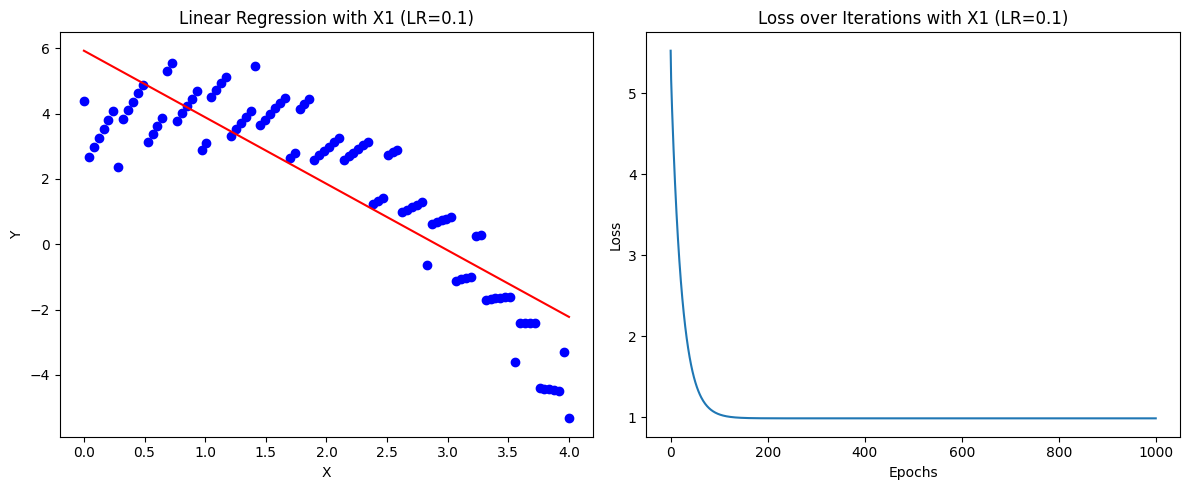

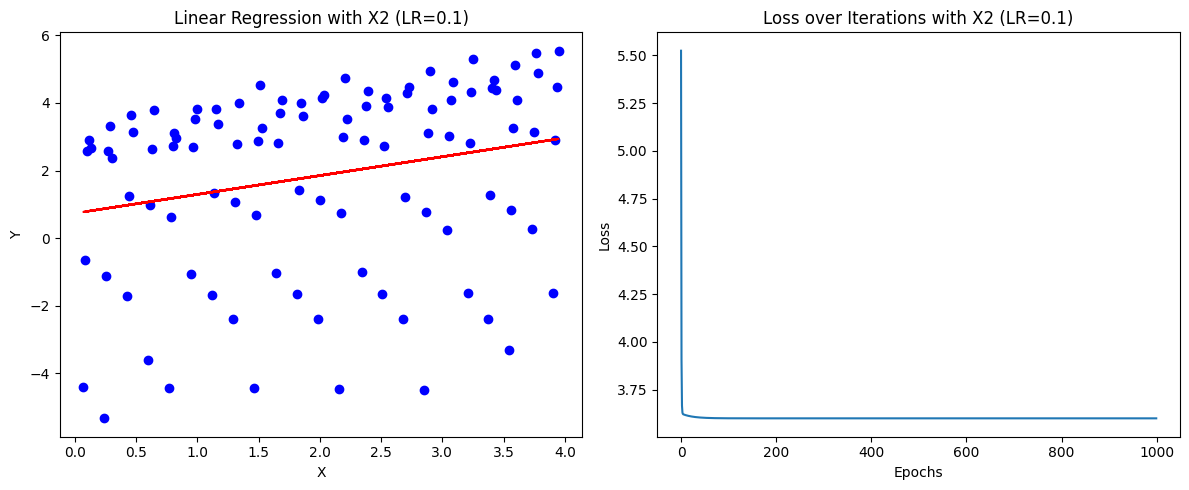

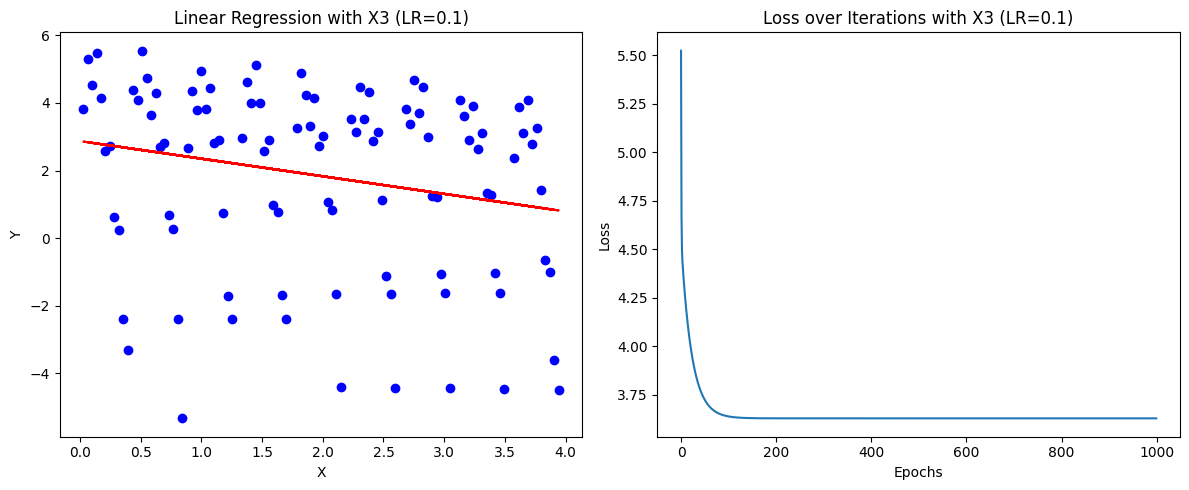

Model for X1 (LR=0.1): Y = -2.0383*X1 + 5.9279
Final loss for X1: 0.9850
Model for X2 (LR=0.1): Y = 0.5576*X2 + 0.7361
Final loss for X2: 3.5994
Model for X3 (LR=0.1): Y = -0.5205*X3 + 2.8714
Final loss for X3: 3.6295
The variable with the lowest loss (LR=0.1): X1 with a final loss of 0.9850
Training with learning rate: 0.05


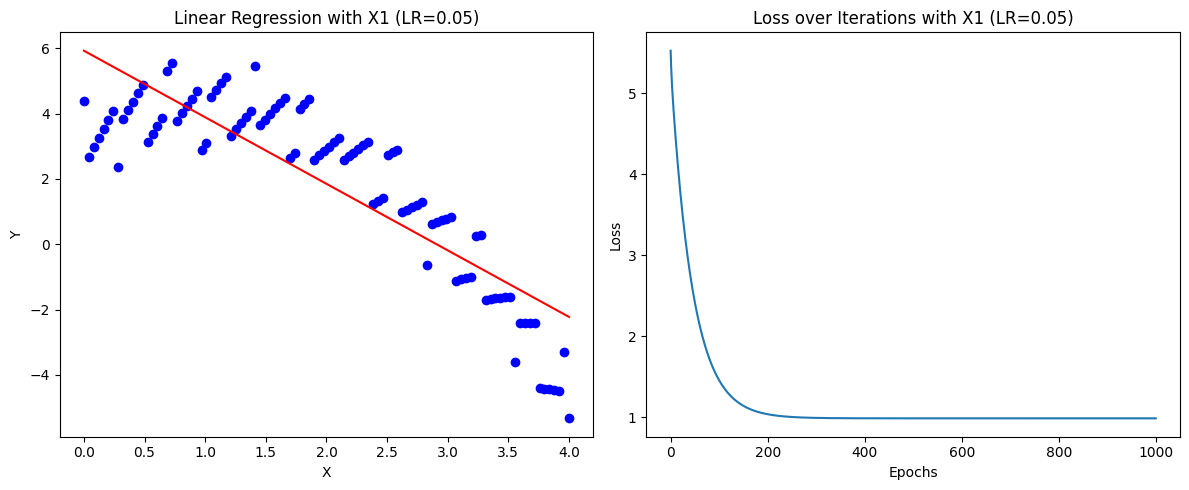

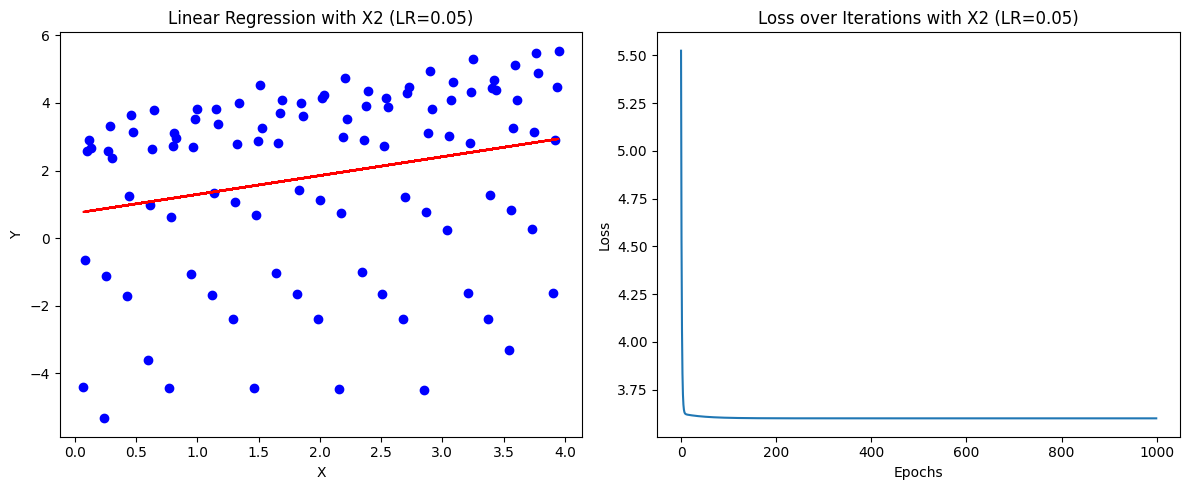

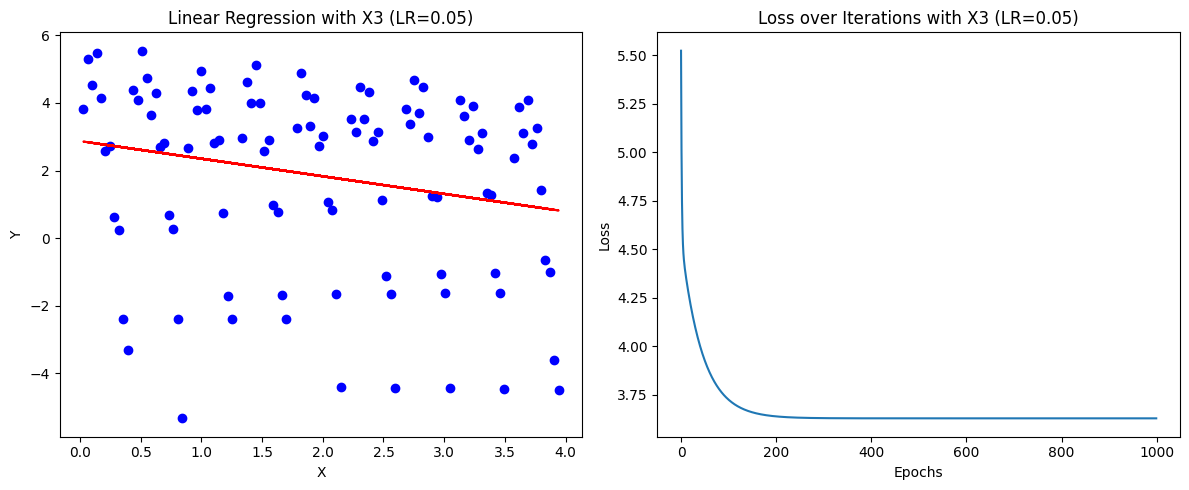

Model for X1 (LR=0.05): Y = -2.0383*X1 + 5.9279
Final loss for X1: 0.9850
Model for X2 (LR=0.05): Y = 0.5576*X2 + 0.7361
Final loss for X2: 3.5994
Model for X3 (LR=0.05): Y = -0.5205*X3 + 2.8714
Final loss for X3: 3.6295
The variable with the lowest loss (LR=0.05): X1 with a final loss of 0.9850
Training with learning rate: 0.01


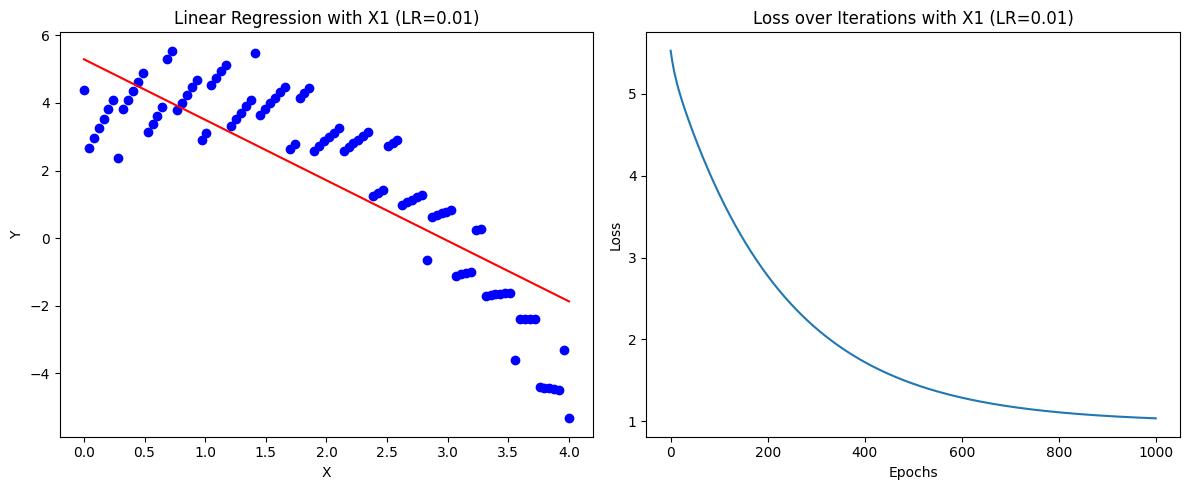

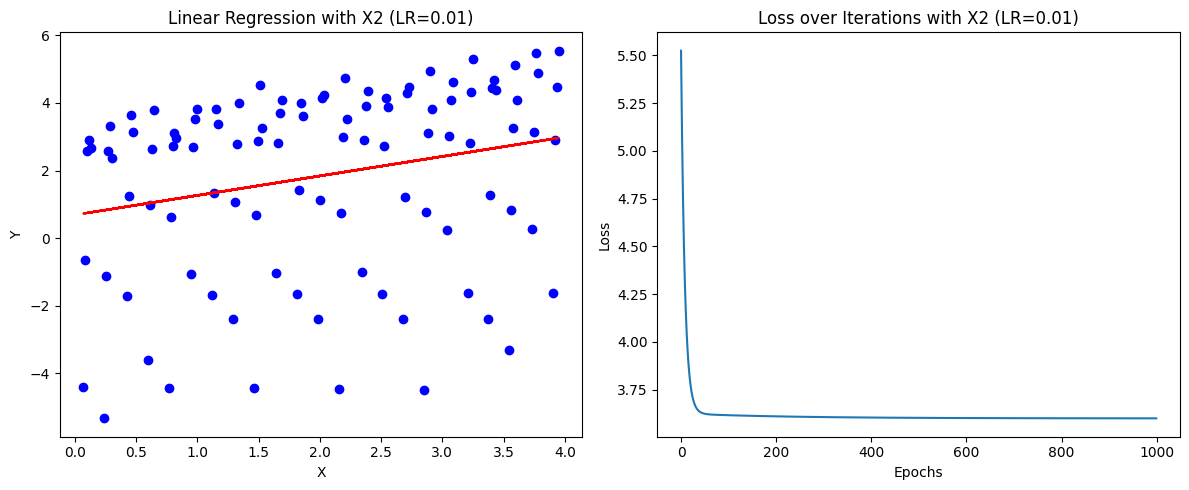

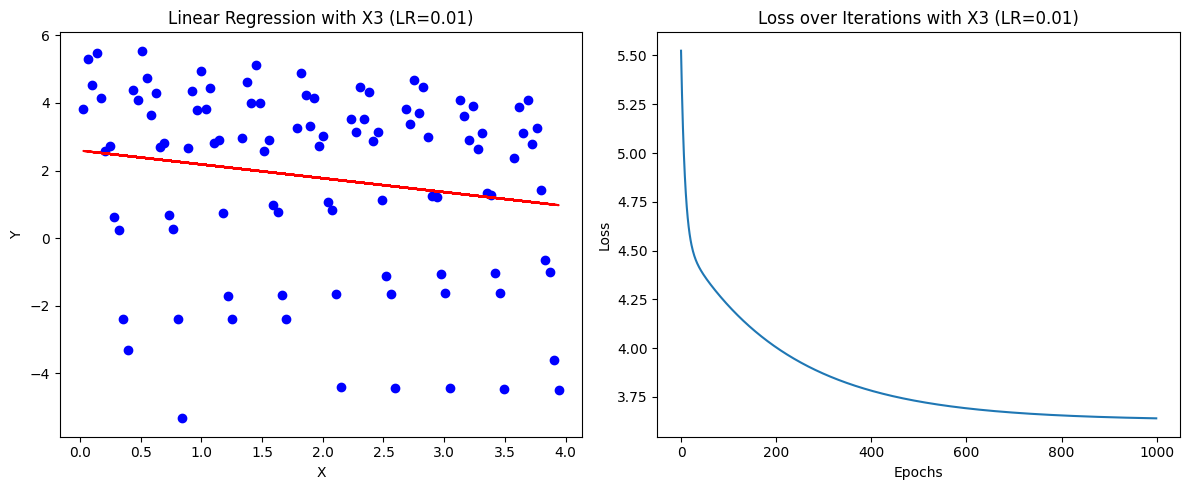

Model for X1 (LR=0.01): Y = -1.7912*X1 + 5.2929
Final loss for X1: 1.0367
Model for X2 (LR=0.01): Y = 0.5767*X2 + 0.6870
Final loss for X2: 3.5997
Model for X3 (LR=0.01): Y = -0.4097*X3 + 2.5912
Final loss for X3: 3.6397
The variable with the lowest loss (LR=0.01): X1 with a final loss of 1.0367


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# URL of the dataset
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'

# Reading the dataset
df = pd.read_csv(url)
print(df.head())

# Extracting features and target variable
X1 = df['X1'].values
X2 = df['X2'].values
X3 = df['X3'].values
Y = df['Y'].values

# Gradient Descent Function
def gradient_descent(X, Y, learning_rate, epochs):
    m = 0  # slope (theta)
    b = 0  # intercept
    n = len(Y)
    losses = []

    for epoch in range(epochs):
        Y_pred = m * X + b
        loss = (1 / (2 * n)) * np.sum((Y_pred - Y) ** 2)
        losses.append(loss)

        # Gradient calculation
        dm = -(1/n) * np.sum(X * (Y - Y_pred))  # derivative of loss with respect to m
        db = -(1/n) * np.sum(Y - Y_pred)        # derivative of loss with respect to b

        # Update parameters
        m = m - learning_rate * dm
        b = b - learning_rate * db

    return m, b, losses

# Function to plot the results
def plot_results(X, Y, m, b, losses, title):
    # Plot regression line
    plt.figure(figsize=(12, 5))

    # Subplot 1: Linear Regression Line
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, color='blue')
    plt.plot(X, m * X + b, color='red')
    plt.title(f"Linear Regression with {title}")
    plt.xlabel('X')
    plt.ylabel('Y')

    # Subplot 2: Loss over Iterations
    plt.subplot(1, 2, 2)
    plt.plot(losses)
    plt.title(f"Loss over Iterations with {title}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

# Training with different explanatory variables
learning_rate = 0.05  # Chosen learning rate
epochs = 1000  # Number of iterations

# X1 as explanatory variable
m1, b1, losses1 = gradient_descent(X1, Y, learning_rate, epochs)
plot_results(X1, Y, m1, b1, losses1, 'X1')

# X2 as explanatory variable
m2, b2, losses2 = gradient_descent(X2, Y, learning_rate, epochs)
plot_results(X2, Y, m2, b2, losses2, 'X2')

# X3 as explanatory variable
m3, b3, losses3 = gradient_descent(X3, Y, learning_rate, epochs)
plot_results(X3, Y, m3, b3, losses3, 'X3')

# Reporting final models
print(f"Model for X1: Y = {m1:.4f}*X1 + {b1:.4f}")
print(f"Model for X2: Y = {m2:.4f}*X2 + {b2:.4f}")
print(f"Model for X3: Y = {m3:.4f}*X3 + {b3:.4f}")

# Reporting final loss for each model
print(f"Final loss for X1: {losses1[-1]:.4f}")
print(f"Final loss for X2: {losses2[-1]:.4f}")
print(f"Final loss for X3: {losses3[-1]:.4f}")


         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375
Training with learning rate: 0.1


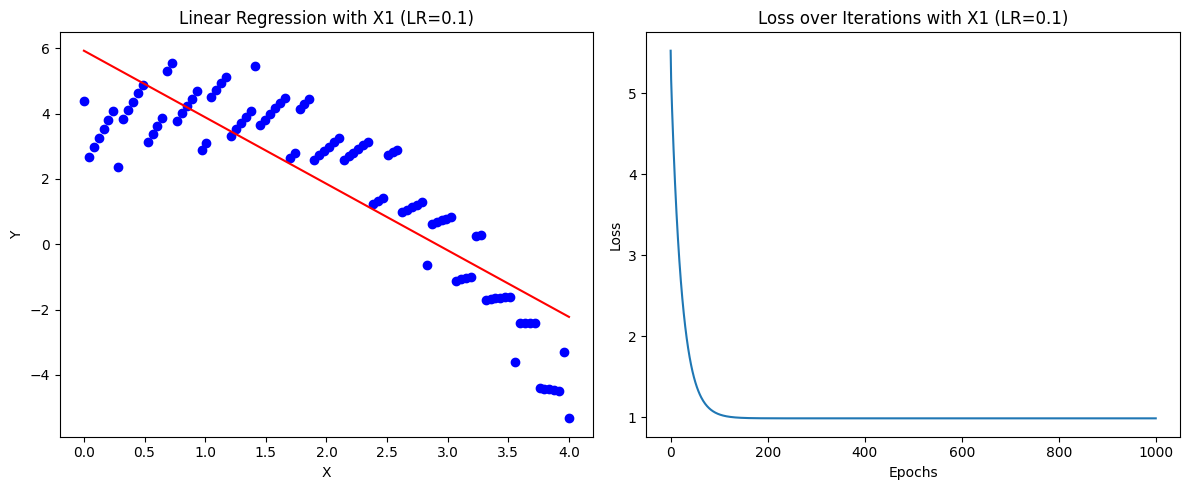

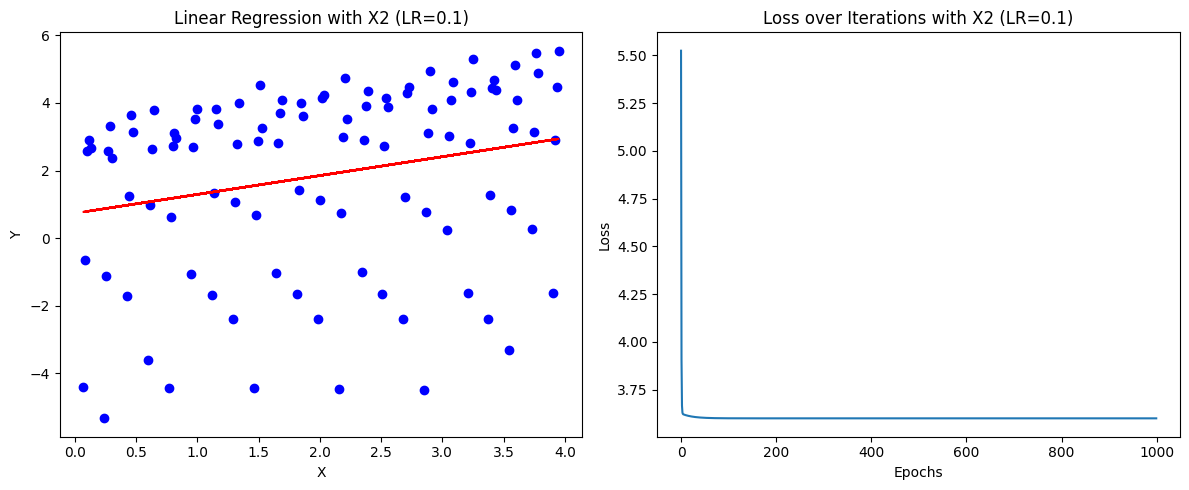

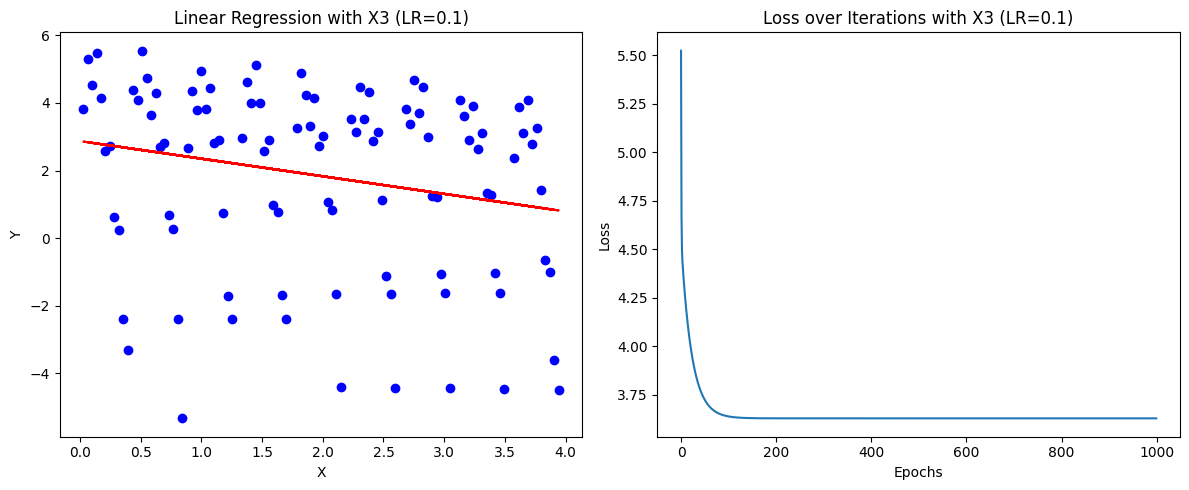

Model for X1 (LR=0.1): Y = -2.0383*X1 + 5.9279
Final loss for X1: 0.9850
Model for X2 (LR=0.1): Y = 0.5576*X2 + 0.7361
Final loss for X2: 3.5994
Model for X3 (LR=0.1): Y = -0.5205*X3 + 2.8714
Final loss for X3: 3.6295
The variable with the lowest loss (LR=0.1): X1 with a final loss of 0.9850
Training with learning rate: 0.05


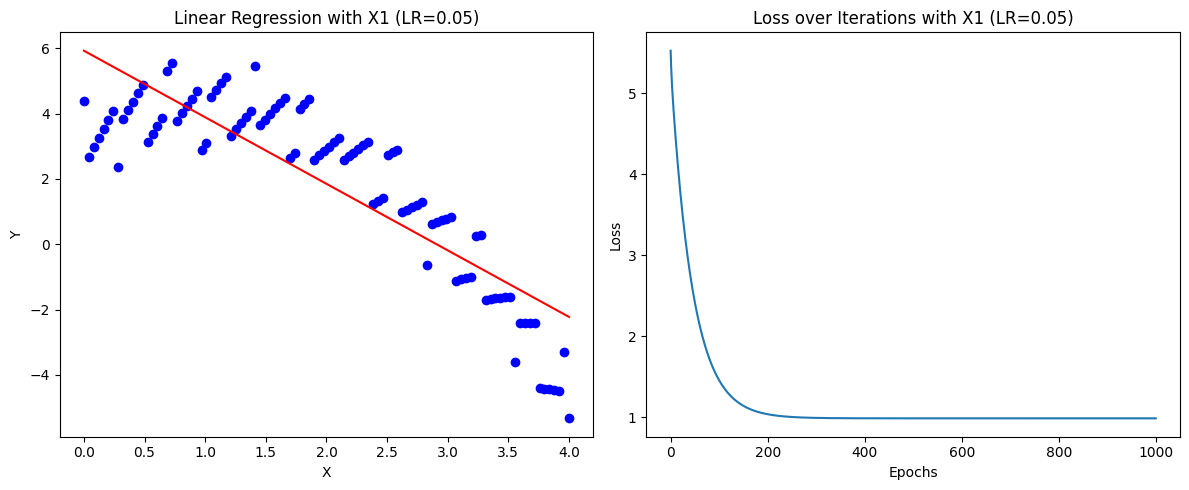

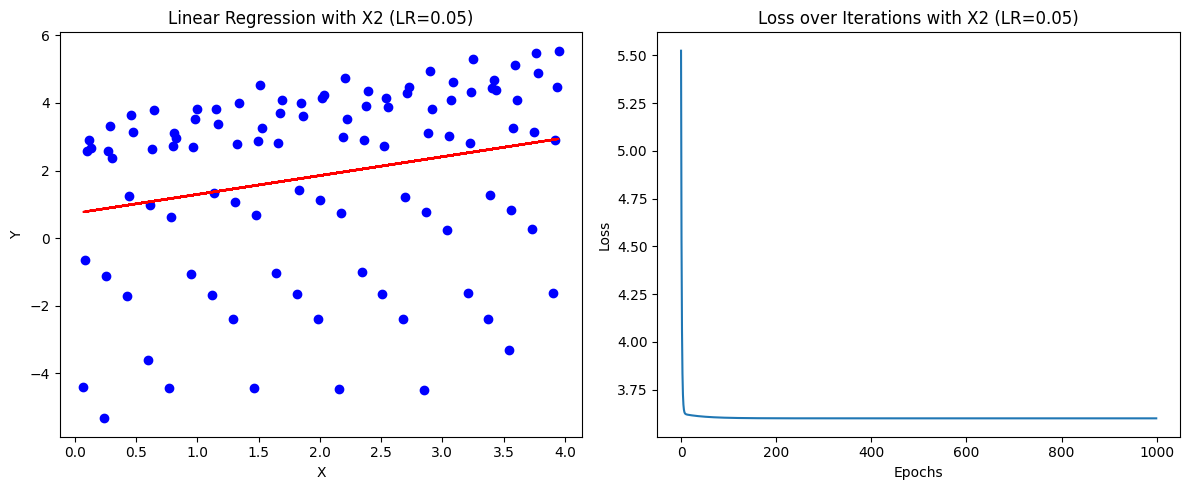

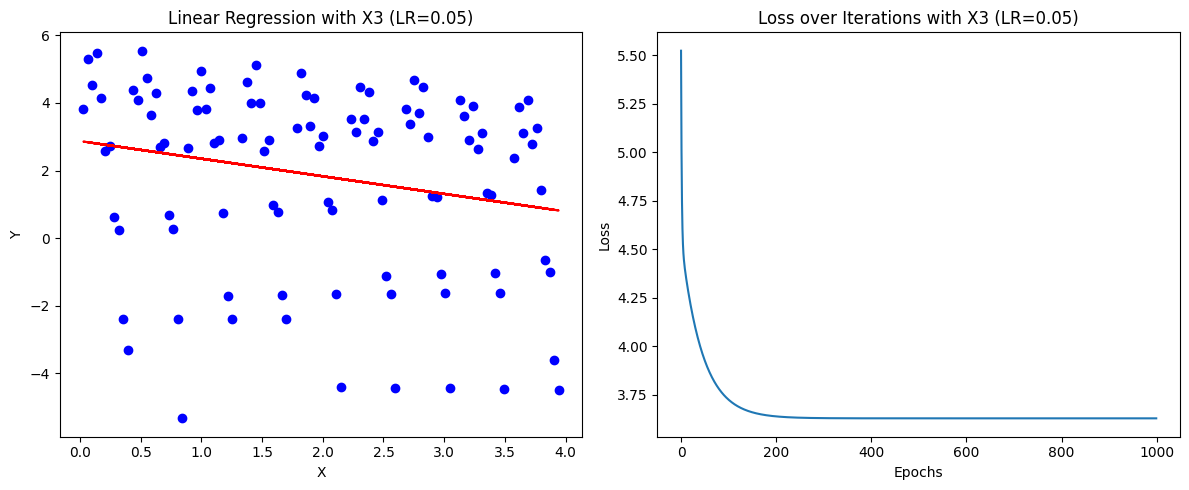

Model for X1 (LR=0.05): Y = -2.0383*X1 + 5.9279
Final loss for X1: 0.9850
Model for X2 (LR=0.05): Y = 0.5576*X2 + 0.7361
Final loss for X2: 3.5994
Model for X3 (LR=0.05): Y = -0.5205*X3 + 2.8714
Final loss for X3: 3.6295
The variable with the lowest loss (LR=0.05): X1 with a final loss of 0.9850
Training with learning rate: 0.01


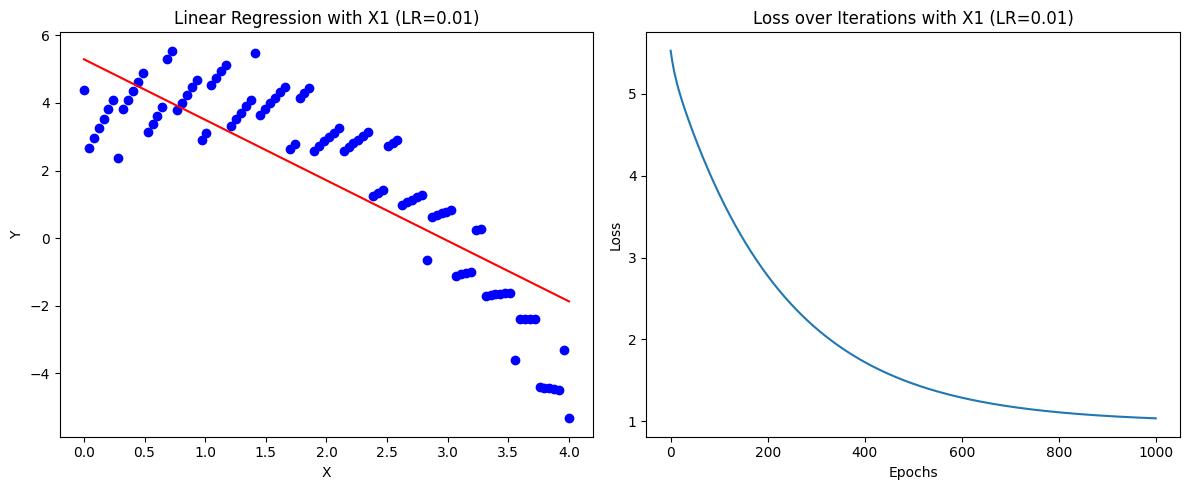

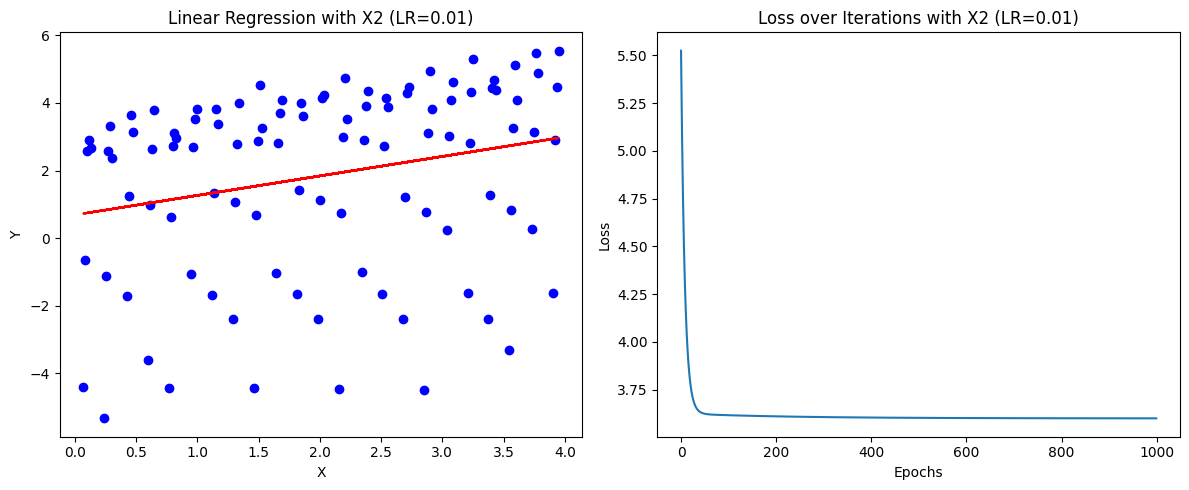

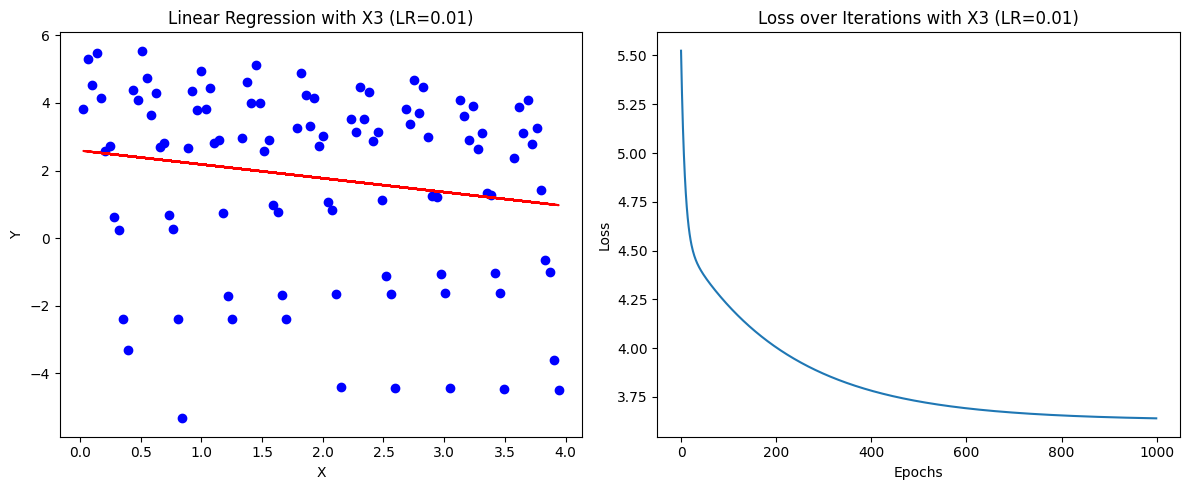

Model for X1 (LR=0.01): Y = -1.7912*X1 + 5.2929
Final loss for X1: 1.0367
Model for X2 (LR=0.01): Y = 0.5767*X2 + 0.6870
Final loss for X2: 3.5997
Model for X3 (LR=0.01): Y = -0.4097*X3 + 2.5912
Final loss for X3: 3.6397
The variable with the lowest loss (LR=0.01): X1 with a final loss of 1.0367


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'

df = pd.read_csv(url)
print(df.head())

X1 = df['X1'].values
X2 = df['X2'].values
X3 = df['X3'].values
Y = df['Y'].values

# Gradient Descent Function
def gradient_descent(X, Y, learning_rate, epochs):
    m = 0  # slope (theta)
    b = 0  # intercept
    n = len(Y)
    losses = []

    for epoch in range(epochs):
        Y_pred = m * X + b
        loss = (1 / (2 * n)) * np.sum((Y_pred - Y) ** 2)
        losses.append(loss)

        # Gradient calculation
        dm = -(1/n) * np.sum(X * (Y - Y_pred))  # derivative of loss with respect to m
        db = -(1/n) * np.sum(Y - Y_pred)        # derivative of loss with respect to b

        # Update parameters
        m = m - learning_rate * dm
        b = b - learning_rate * db

    return m, b, losses

# Function to plot the results
def plot_results(X, Y, m, b, losses, title):
    # Plot regression line
    plt.figure(figsize=(12, 5))

    # Subplot 1: Linear Regression Line
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, color='blue')
    plt.plot(X, m * X + b, color='red')
    plt.title(f"Linear Regression with {title}")
    plt.xlabel('X')
    plt.ylabel('Y')

    # Subplot 2: Loss over Iterations
    plt.subplot(1, 2, 2)
    plt.plot(losses)
    plt.title(f"Loss over Iterations with {title}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

# Training with different learning rates
learning_rates = [0.1, 0.05, 0.01]  # Exploring different learning rates
epochs = 1000  # Number of iterations

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")

    # X1
    m1, b1, losses1 = gradient_descent(X1, Y, lr, epochs)
    plot_results(X1, Y, m1, b1, losses1, f'X1 (LR={lr})')

    # X2
    m2, b2, losses2 = gradient_descent(X2, Y, lr, epochs)
    plot_results(X2, Y, m2, b2, losses2, f'X2 (LR={lr})')

    # X3
    m3, b3, losses3 = gradient_descent(X3, Y, lr, epochs)
    plot_results(X3, Y, m3, b3, losses3, f'X3 (LR={lr})')

    # Report final models and losses for each variable at this learning rate
    print(f"Model for X1 (LR={lr}): Y = {m1:.4f}*X1 + {b1:.4f}")
    print(f"Final loss for X1: {losses1[-1]:.4f}")

    print(f"Model for X2 (LR={lr}): Y = {m2:.4f}*X2 + {b2:.4f}")
    print(f"Final loss for X2: {losses2[-1]:.4f}")

    print(f"Model for X3 (LR={lr}): Y = {m3:.4f}*X3 + {b3:.4f}")
    print(f"Final loss for X3: {losses3[-1]:.4f}")

    # Find the variable with the lowest loss at this learning rate
    lowest_loss_var = min([('X1', losses1[-1]), ('X2', losses2[-1]), ('X3', losses3[-1])], key=lambda x: x[1])
    print(f"The variable with the lowest loss (LR={lr}): {lowest_loss_var[0]} with a final loss of {lowest_loss_var[1]:.4f}")


         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375
Final Model: Y = -1.9988*X1 + 0.5384*X2 + -0.2605*X3 + 5.2791


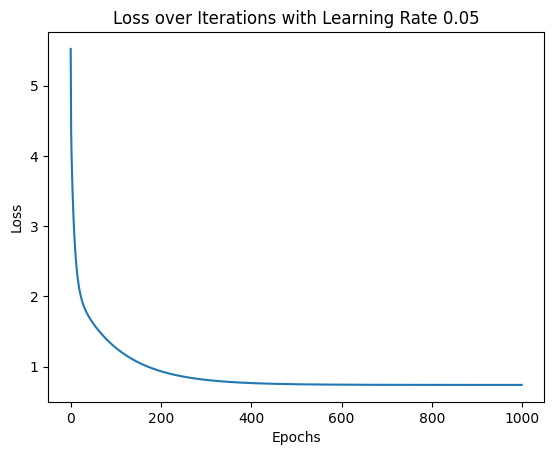

Final loss: 0.7385
Prediction for (X1, X2, X3) = [1 1 1]: Y = 3.5582
Prediction for (X1, X2, X3) = [2 0 4]: Y = 0.2397
Prediction for (X1, X2, X3) = [3 2 1]: Y = 0.0991

Learning rate: 0.01
Final Model: Y = -1.7332*X1 + 0.8490*X2 + 0.0151*X3 + 3.3993
Final loss: 0.9342


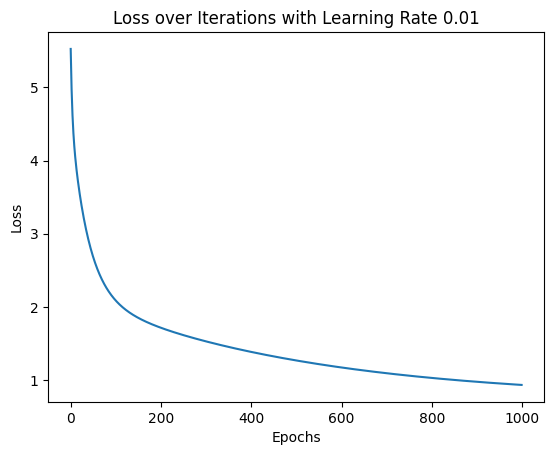


Learning rate: 0.05
Final Model: Y = -1.9988*X1 + 0.5384*X2 + -0.2605*X3 + 5.2791
Final loss: 0.7385


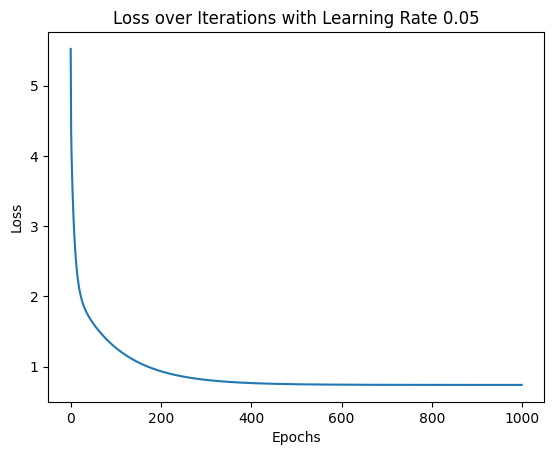


Learning rate: 0.1
Final Model: Y = -2.0037*X1 + 0.5326*X2 + -0.2656*X3 + 5.3139
Final loss: 0.7385


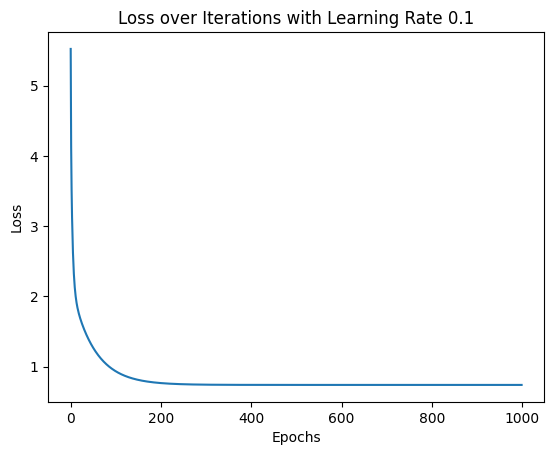

In [8]:
#Part 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# URL of the dataset
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'

# Reading the dataset
df = pd.read_csv(url)
print(df.head())

X = df[['X1', 'X2', 'X3']].values  # Multivariate X (all three features)
Y = df['Y'].values

# Gradient Descent Function for Multivariate Linear Regression
def gradient_descent_multi(X, Y, learning_rate, epochs):
    n = len(Y)  # Number of data points
    theta = np.zeros(X.shape[1])  # Initialize theta (parameters) to zero for each feature
    b = 0  # Initialize intercept to zero
    losses = []  # To store loss values

    for epoch in range(epochs):
        # Calculate the prediction
        Y_pred = np.dot(X, theta) + b  # Y_pred = theta1*X1 + theta2*X2 + theta3*X3 + b
        loss = (1 / (2 * n)) * np.sum((Y_pred - Y) ** 2)
        losses.append(loss)

        # Gradient calculation
        dtheta = -(1/n) * np.dot(X.T, (Y - Y_pred))  # Derivative of loss w.r.t theta
        db = -(1/n) * np.sum(Y - Y_pred)  # Derivative of loss w.r.t intercept

        # Update parameters
        theta -= learning_rate * dtheta
        b -= learning_rate * db

    return theta, b, losses

# Function to plot the results (loss over iterations)
def plot_loss(losses, title):
    plt.plot(losses)
    plt.title(f"Loss over Iterations with {title}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

# Training with all explanatory variables
learning_rate = 0.05  # Chosen learning rate
epochs = 1000  # Number of iterations

# Train the model using gradient descent
theta, b, losses = gradient_descent_multi(X, Y, learning_rate, epochs)

# Report the final linear model
print(f"Final Model: Y = {theta[0]:.4f}*X1 + {theta[1]:.4f}*X2 + {theta[2]:.4f}*X3 + {b:.4f}")

# Plot loss over iterations
plot_loss(losses, f"Learning Rate {learning_rate}")

# Reporting final loss
print(f"Final loss: {losses[-1]:.4f}")

# Predictions for new data points
new_data = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
predictions = np.dot(new_data, theta) + b  # Predicting Y for new inputs
for i, pred in enumerate(predictions):
    print(f"Prediction for (X1, X2, X3) = {new_data[i]}: Y = {pred:.4f}")

# Test different learning rates
learning_rates = [0.01, 0.05, 0.1]
for lr in learning_rates:
    theta_lr, b_lr, losses_lr = gradient_descent_multi(X, Y, lr, epochs)
    print(f"\nLearning rate: {lr}")
    print(f"Final Model: Y = {theta_lr[0]:.4f}*X1 + {theta_lr[1]:.4f}*X2 + {theta_lr[2]:.4f}*X3 + {b_lr:.4f}")
    print(f"Final loss: {losses_lr[-1]:.4f}")
    plot_loss(losses_lr, f"Learning Rate {lr}")
